In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [6]:
#Load customers data
customersdata = pd.read_csv("customer_data.csv")

In [7]:
customersdata.head()

,customer_id,products_purchased,complains,money_spent
0,1000661,1,0,260.0
1,1001914,1,0,790.2
2,1002387,1,0,890.0
3,1000660,1,0,261.0
4,1001913,1,0,791.2


In [8]:
# Define K-means model
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42)

In [9]:
# Train the model
kmeans_model.fit(customersdata[['products_purchased','complains',
'money_spent']])

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=400, random_state=42)

In [10]:
# Create the K means model for different values of K
def try_different_clusters(K, data):

    cluster_values = list(range(1, K+1))
    inertias=[]

    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)

    return inertias

In [27]:
# Find output for k values between 1 to 12 
outputs = try_different_clusters(12, customersdata[['products_purchased','complains','money_spent']])
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})
distances

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

,clusters,sum of squared distances
0,1,2.468339e+09
1,2,9.186417e+07
2,3,2.530145e+07
3,4,1.755279e+06
4,5,1.170324e+05
5,6,4.943224e+04
6,7,3.253224e+04
7,8,2.503212e+04
8,9,1.803124e+04
9,10,1.253212e+04


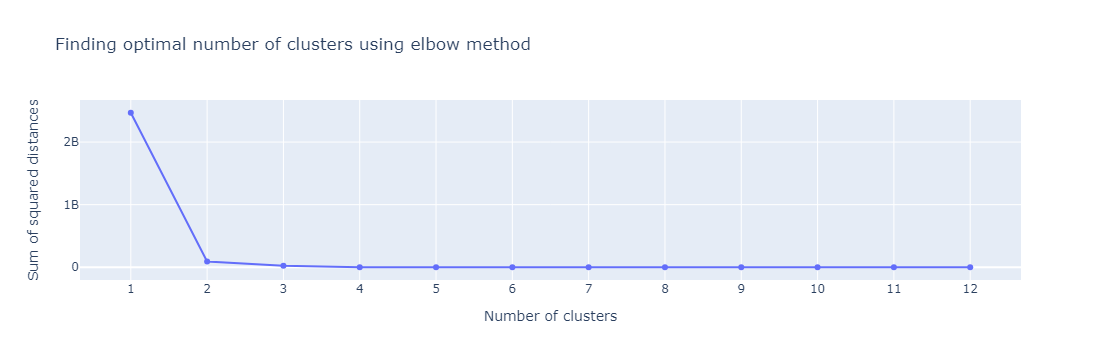

In [26]:
# Finding optimal number of clusters k
figure = go.Figure()
figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances",
                  title_text="Finding optimal number of clusters using elbow method")
figure.show()

In [18]:
# Re-Train K means model with k=5
kmeans_model_new = KMeans(n_clusters = 5,init='k-means++',max_iter=400,random_state=42)

kmeans_model_new.fit_predict(customersdata[['products_purchased','complains','money_spent']])

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([4, 3, 1, ..., 0, 0, 0])

In [19]:
# Create data arrays
cluster_centers = kmeans_model_new.cluster_centers_
data = np.expm1(cluster_centers)
points = np.append(data, cluster_centers, axis=1)
points

C:\Users\hp\AppData\Local\Temp\ipykernel_5748\3873240996.py:3: RuntimeWarning:

overflow encountered in expm1



array([[1.90855369e+001, 2.04697370e-016, 1.09015568e+102,
        3.00000000e+000, 2.04697370e-016, 2.34950000e+002],
       [1.71828183e+000, 2.02013400e-002,             inf,
        1.00000000e+000, 2.00000000e-002, 8.91750000e+002],
       [6.38905610e+000, 5.01252086e-003, 1.14301649e+045,
        2.00000000e+000, 5.00000000e-003, 1.03750000e+002],
       [1.71828183e+000, 1.00501671e-002,             inf,
        1.00000000e+000, 1.00000000e-002, 7.92700000e+002],
       [1.71828183e+000, 1.51130646e-002, 2.24315755e+113,
        1.00000000e+000, 1.50000000e-002, 2.61000000e+002]])

In [20]:
# Add "clusters" to customers data
points = np.append(points, [[0], [1], [2], [3], [4]], axis=1)
customersdata["clusters"] = kmeans_model_new.labels_

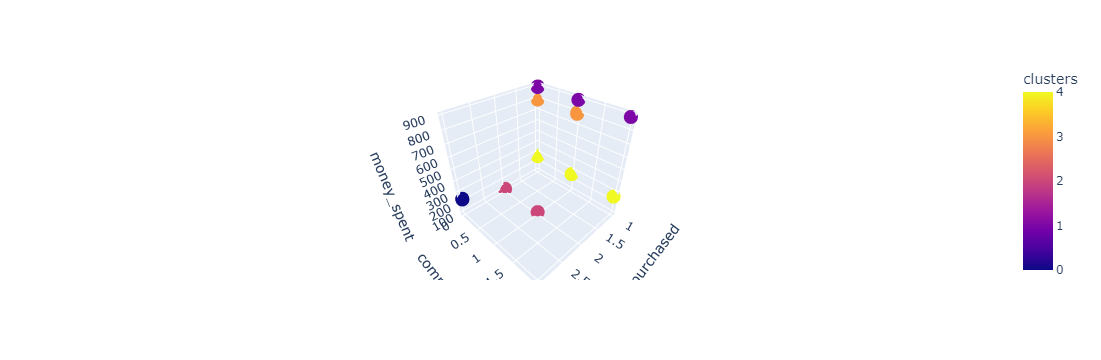

In [21]:
# visualize clusters
figure = px.scatter_3d(customersdata,
                    color='clusters',
                    x="products_purchased",
                    y="complains",
                    z="money_spent",
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}
                    )
figure.update_layout()
figure.show()